In [15]:
import os
import pandas as pd
import numpy as np

In [16]:
# os.listdir('C://Users//CUONG NGUYEN//Jupiter NoteBook//Data Engineer//Project_Data_Analyst')

## 1. Load and Clean Data

In [17]:
schema_fname = './data/survey_results_schema.csv'
public_fname = './data/survey_results_public.csv'

In [18]:
schema_raw = pd.read_csv(schema_fname, index_col = 'Column').QuestionText
# chỉ chọn cột cần quan tâm
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [19]:
schema_raw['Employment']

'Which of the following best describes your current employment status?'

In [20]:
survey_raw_df = pd.read_csv(public_fname)
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [21]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [22]:
# copy data từ survey_raw_df sang survey_df với 20 columns of selected_columns
survey_df = survey_raw_df[selected_columns].copy()
schema = schema_raw[selected_columns]

In [23]:
schema.shape

(20,)

In [24]:
survey_df.shape

(64461, 20)

In [25]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [26]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [27]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [28]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [29]:
# cast tring -> numeric, errors = 'coerce' trả về giá trị NaN nếu ko phải là số 
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [30]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


#### We see that min, max Age, and Age1stCode values from 1 - > 5 are not possible. Due to incorrect user input. Drop data field with wrong value

In [31]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 80].index, inplace=True)

survey_df.drop(survey_df[survey_df.Age1stCode < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age1stCode > 80].index, inplace=True)

#### Drop WorkWeekHrs > 140h (~20 hours per day) 

In [32]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [33]:
# Dataframe sau khi loại bỏ thông tin sai
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,41537.000000,52541.000000,51931.000000,40263.000000,37650.000000
mean,30.605068,16.182486,12.188134,8.542260,39.985377
std,9.347991,4.669182,9.141513,7.698519,10.657218
min,10.000000,10.000000,1.000000,1.000000,1.000000
25%,24.000000,13.000000,6.000000,3.000000,40.000000
50%,29.000000,16.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,16.000000,11.000000,43.000000
max,80.000000,76.000000,50.000000,50.000000,140.000000


In [34]:
survey_df['Gender'].value_counts()

Man                                                            42057
Woman                                                           3601
Non-binary, genderqueer, or gender non-conforming                318
Man;Non-binary, genderqueer, or gender non-conforming            100
Woman;Non-binary, genderqueer, or gender non-conforming           74
Woman;Man                                                         61
Woman;Man;Non-binary, genderqueer, or gender non-conforming       20
Name: Gender, dtype: int64

In [35]:
# delete inappropriate gender values
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [36]:
survey_df['Gender'].value_counts()

Man                                                  42057
Woman                                                 3601
Non-binary, genderqueer, or gender non-conforming      318
Name: Gender, dtype: int64

In [37]:
# lấy ngẫu nhiên 10 giá trị
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
20120,United States,42.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,32.0,21.0,HTML/CSS;JavaScript;Objective-C;PHP;SQL;Swift,PHP;SQL;Swift,Once a year,Meditate;Play games;Visit Stack Overflow;Go fo...,"Independent contractor, freelancer, or self-em...","Database administrator;Developer, back-end;Dev...",NaN,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Not at all important/not necessary
40996,Mongolia,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN
18942,United States,61.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A social science (such as anthropology, psycho...",Yes,26.0,35.0,33.0,Python,Go;Python,Once every few years,Visit Stack Overflow,Employed full-time,"Developer, back-end",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Somewhat important
56175,France,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,No,20.0,3.0,2.0,Python,Julia,Once every few years,Visit Stack Overflow;Do other work and come ba...,Employed full-time,Data scientist or machine learning specialist,44.0,Slightly satisfied,Industry that I’d be working in;How widely use...,Often: 1-2 days per week or more,Very important
19319,Peru,29.0,Man,"Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,12.0,7.0,Bash/Shell/PowerShell;C#;Go;HTML/CSS;Java;Java...,C++;Dart;Haskell;Rust,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",48.0,Slightly satisfied,Remote work options;Financial performance or f...,Sometimes: 1-2 days per month but less than we...,Somewhat important
56743,Canada,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,20.0,38.0,38.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack;DevOps specialist;Produc...",40.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Never,Very important
61494,Germany,45.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,21.0,18.0,HTML/CSS;Java;JavaScript;SQL,HTML/CSS;Java;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Very satisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Fairly important
18428,United Kingdom,25.0,Man,Some college/university study without earning ...,"A humanities discipline (such as literature, h...",Yes,13.0,8.0,1.0,C#;Java;JavaScript;TypeScript,TypeScript,Once a year,Visit Stack Overflow,Employed full-time,"Developer, back-end",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Not at all important/not necessary
1224,United States,56.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,40.0,33.0,Bash/Shell/PowerShell;C;HTML/CSS;Java;JavaScri...,HTML/CSS;Java;JavaScript;Python;SQL;TypeScript,Once every few years,Go for a walk or other physical activity;Do ot...,Employed full-time,"Database administrator;Developer, back-end;Dev...",45.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
41825,Nigeria,NaN,NaN,Some college/university study without earning ...,"Information systems, information

## 2. Exploratory Analysis and Visualization

In [38]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['figure.facecolor'] = '#00000000'

### 2.1 Plot 10 countries with the highest number of responses?

In [39]:
schema.Country

'Where do you live?'

In [40]:
survey_df.Country.nunique()

183

In [41]:
# Identify countries with the highest number of respondent using value_counts()
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         10969
India                  8164
Germany                3546
United Kingdom         3357
Canada                 1977
France                 1759
Brazil                 1737
Netherlands            1216
Poland                 1160
Spain                  1085
Australia              1042
Italy                  1034
Russian Federation      987
Pakistan                793
Sweden                  787
Name: Country, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Where do you live?'}, ylabel='Country'>

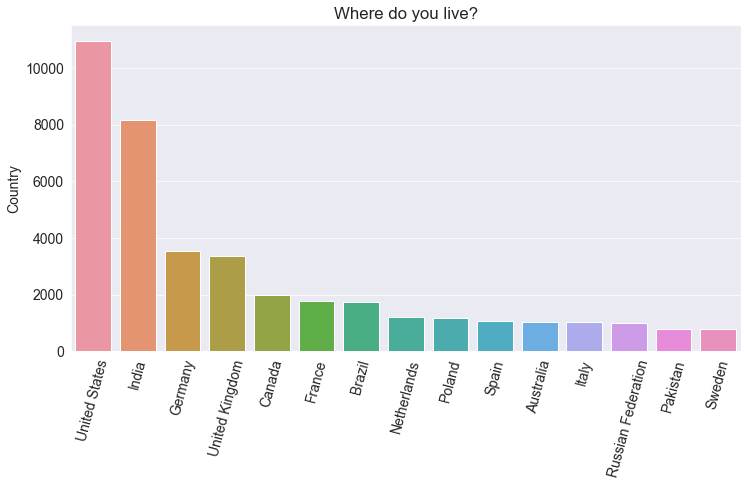

In [42]:
# Visualize using barchart
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(top_countries.index, top_countries)

### 2. What is your age (in years)?

In [43]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

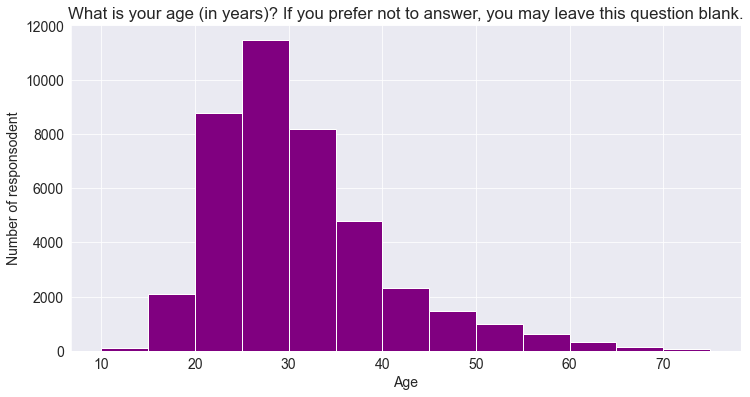

In [44]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of responsodent')

plt.hist(survey_df.Age, bins = np.arange(10, 80, 5), color='purple');

### Gender

In [45]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [46]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  42057
Woman                                                 3601
Non-binary, genderqueer, or gender non-conforming      318
Name: Gender, dtype: int64

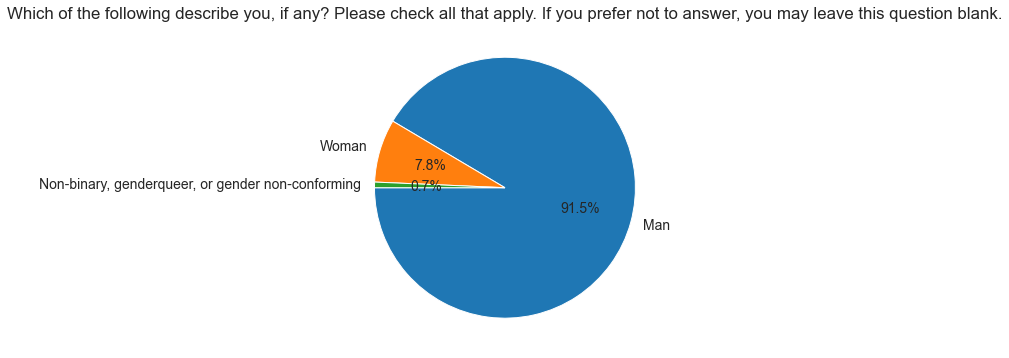

In [47]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

## 3. Salary Prediction

In [48]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [50]:
df_survey = survey_raw_df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df_survey = df_survey.rename({"ConvertedComp": "Salary"}, axis = 1)
df_survey.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [51]:
df_survey = df_survey[df_survey["Salary"].notnull()]
df_survey.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [52]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [54]:
df_survey = df_survey.dropna()
df_survey.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [56]:
df_survey = df_survey[df_survey["Employment"] == "Employed full-time"]
df_survey = df_survey.drop("Employment", axis = 1)
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [57]:
df_survey['Country'].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [58]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [59]:
country_map = shorten_categories(df_survey.Country.value_counts(), 400)
df_survey['Country'] = df_survey['Country'].map(country_map)
df_survey['Country'].value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

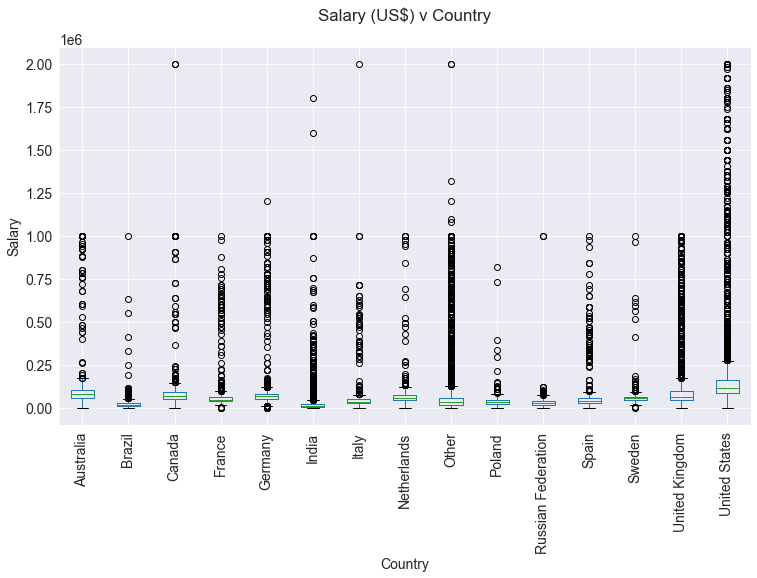

In [64]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df_survey.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [65]:
df_survey = df_survey[df_survey["Salary"] <= 250000]
df_survey = df_survey[df_survey["Salary"] >= 10000]
df_survey = df_survey[df_survey["Country"] != 'Other']

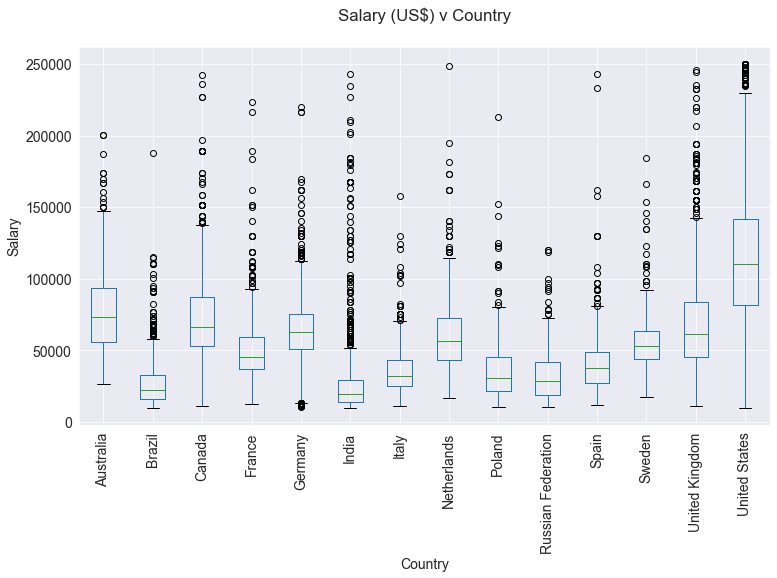

In [66]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df_survey.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [68]:
df_survey["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [70]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df_survey["YearsCodePro"] = df_survey["YearsCodePro"].apply(clean_experience)

In [72]:
df_survey["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [73]:
def clean_educaton(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df_survey["EdLevel"] = df_survey["EdLevel"].apply(clean_educaton)

In [74]:
df_survey["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [75]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df_survey['EdLevel'] = le_education.fit_transform(df_survey['EdLevel'])
df_survey["EdLevel"].unique()

array([0, 2, 1, 3])

In [76]:
le_country = LabelEncoder()
df_survey['Country'] = le_country.fit_transform(df_survey['Country'])
df_survey["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [78]:
X = df_survey.drop("Salary", axis = 1)
y = df_survey["Salary"]

In [80]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [81]:
y_pred = linear_reg.predict(X)

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
error = np.sqrt(mean_squared_error(y, y_pred))
error

39274.75368318509

In [85]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=42)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=42)

In [86]:
y_pred = dec_tree_reg.predict(X)

In [87]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,414.94


In [88]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=30)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=30)

In [89]:
y_pred = random_forest_reg.predict(X)

In [90]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,491.39


In [101]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(random_state = 32)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=RandomForestRegressor(random_state=32),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [102]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,285.55


In [100]:
X

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,2,4.0
10,12,0,2.0
11,10,1,7.0
12,7,1,20.0
...,...,...,...
64113,13,1,15.0
64116,13,0,6.0
64122,13,1,4.0
64127,13,3,12.0


In [111]:
X = np.array([["United States", "Master’s degree", 4]])
X

array([['United States', 'Master’s degree', '4']], dtype='<U15')

In [112]:
X[:, 0] = le_country.transform(X[:, 0])
X[:, 1] = le_education.transform(X[:, 1])
X = X.astype(float)
X

array([[13.,  2.,  4.]])

In [113]:
y_pred = regressor.predict(X)
y_pred

array([110727.46024352])

In [114]:
import pickle

In [115]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('save_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [117]:
with open('save_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [118]:
y_pred = regressor_loaded.predict(X)
y_pred

array([110727.46024352])